In [2]:
import json
from pyspark import SparkContext, SparkConf, StorageLevel

In [3]:
conf = SparkConf().setMaster('local').setAppName('jsonApp')
sc = SparkContext(conf=conf)

In [6]:
# 从文本文件中读取json数据
# 需要import json
rdd_json = sc.textFile('file:///D:/Projects/python_projects/big_data/data/profile.json')
new_rdd = rdd_json.map(lambda line: json.loads(line))

In [7]:
new_rdd.first()['type']

'profile_set'

In [8]:
new_rdd.take(3)

[{'type': 'profile_set',
  'distinct_id': 'UC.aed7566e01ed4fb99be03f980ff4293f',
  'properties': {'os_ver': 'Android OS 8.0.0 / API-26 (HUAWEIFRD-AL00/535(C00))',
   'device_id': 'ce7a9c904768320eadee8dd238550dcb',
   'device_model': 'HUAWEI FRD-AL00',
   'os': 'Android',
   'server_id': 102,
   'login_ip': '222.188.128.144',
   'register_time': '2018-10-16 10:01:45.000',
   'log_type': 'account',
   'connect_id': 4,
   'platform_id': 1,
   'register_ip': '117.63.92.26',
   'channel_id': 104,
   'account': 'UC.aed7566e01ed4fb99be03f980ff4293f',
   'game_id': 1,
   'app_code': 3}},
 {'type': 'profile_set',
  'distinct_id': 'UC.3ea5453b6b6542f29bd9d46630a1a068',
  'properties': {'os_ver': 'Android OS 8.1.0 / API-27 (HUAWEICLT-AL01/171(C00))',
   'device_id': '86de61c26d74836a0164e407daf62a98',
   'device_model': 'HUAWEI CLT-AL01',
   'os': 'Android OS',
   'server_id': 102,
   'login_ip': '117.136.41.73',
   'register_time': '2018-10-16 09:59:30.000',
   'log_type': 'account',
   'connec

In [9]:
# 转换为pairRDD
def get_dicts(dicts):
    print(dicts)
    for key, val in dicts.items():
        yield (key, val)

In [10]:
new_pair_rdd = new_rdd.flatMap(get_dicts)

In [11]:
new_pair_rdd.take(6)

[('type', 'profile_set'),
 ('distinct_id', 'UC.aed7566e01ed4fb99be03f980ff4293f'),
 ('properties',
  {'os_ver': 'Android OS 8.0.0 / API-26 (HUAWEIFRD-AL00/535(C00))',
   'device_id': 'ce7a9c904768320eadee8dd238550dcb',
   'device_model': 'HUAWEI FRD-AL00',
   'os': 'Android',
   'server_id': 102,
   'login_ip': '222.188.128.144',
   'register_time': '2018-10-16 10:01:45.000',
   'log_type': 'account',
   'connect_id': 4,
   'platform_id': 1,
   'register_ip': '117.63.92.26',
   'channel_id': 104,
   'account': 'UC.aed7566e01ed4fb99be03f980ff4293f',
   'game_id': 1,
   'app_code': 3}),
 ('type', 'profile_set'),
 ('distinct_id', 'UC.3ea5453b6b6542f29bd9d46630a1a068'),
 ('properties',
  {'os_ver': 'Android OS 8.1.0 / API-27 (HUAWEICLT-AL01/171(C00))',
   'device_id': '86de61c26d74836a0164e407daf62a98',
   'device_model': 'HUAWEI CLT-AL01',
   'os': 'Android OS',
   'server_id': 102,
   'login_ip': '117.136.41.73',
   'register_time': '2018-10-16 09:59:30.000',
   'log_type': 'account',
  

In [12]:
# 获得properties数据
def get_dicts2(dicts):
    for key, val in dicts['properties'].items():
        yield (key, val)

In [13]:
new_pair_rdd2 = new_rdd.flatMap(get_dicts2)

In [14]:
new_pair_rdd2.take(28)

[('os_ver', 'Android OS 8.0.0 / API-26 (HUAWEIFRD-AL00/535(C00))'),
 ('device_id', 'ce7a9c904768320eadee8dd238550dcb'),
 ('device_model', 'HUAWEI FRD-AL00'),
 ('os', 'Android'),
 ('server_id', 102),
 ('login_ip', '222.188.128.144'),
 ('register_time', '2018-10-16 10:01:45.000'),
 ('log_type', 'account'),
 ('connect_id', 4),
 ('platform_id', 1),
 ('register_ip', '117.63.92.26'),
 ('channel_id', 104),
 ('account', 'UC.aed7566e01ed4fb99be03f980ff4293f'),
 ('game_id', 1),
 ('app_code', 3),
 ('os_ver', 'Android OS 8.1.0 / API-27 (HUAWEICLT-AL01/171(C00))'),
 ('device_id', '86de61c26d74836a0164e407daf62a98'),
 ('device_model', 'HUAWEI CLT-AL01'),
 ('os', 'Android OS'),
 ('server_id', 102),
 ('login_ip', '117.136.41.73'),
 ('register_time', '2018-10-16 09:59:30.000'),
 ('log_type', 'account'),
 ('connect_id', 4),
 ('platform_id', 1),
 ('register_ip', '120.229.57.26'),
 ('channel_id', 104),
 ('account', 'UC.3ea5453b6b6542f29bd9d46630a1a068')]

In [15]:
# 统计os = Android的用户有多少
android_count = new_pair_rdd2.filter(lambda x: x[0] == 'os').filter(
    lambda x: x[1] == 'Android').count()

In [16]:
android_count

8155

In [17]:
# new_pair_rdd2.saveAsTextFile('data/os_android.log')

## 统计每天的注册人数

In [26]:
# 选出注册数据
register_rdd = new_pair_rdd2.filter(lambda x: x[0] == 'register_time')

In [27]:
register_rdd.take(5)

[('register_time', '2018-10-16 10:01:45.000'),
 ('register_time', '2018-10-16 09:59:30.000'),
 ('register_time', '2018-12-18 12:19:42.000'),
 ('register_time', '2019-01-24 16:06:14.000'),
 ('register_time', '2018-08-30 13:03:08.000')]

In [28]:
# 转换成以日期为key的RDD
def get_register_date(x):
    date = x[1][:9]
    return (date, 1)


register_date_rdd = register_rdd.map(get_register_date)

In [29]:
register_data = register_date_rdd.reduceByKey(lambda x, y: x + y).sortByKey()

In [30]:
register_data.take(10)

[('2018-08-2', 63),
 ('2018-08-3', 2485),
 ('2018-09-0', 836),
 ('2018-09-1', 2),
 ('2018-09-2', 212),
 ('2018-09-3', 2),
 ('2018-10-0', 1),
 ('2018-10-1', 6847),
 ('2018-10-2', 667),
 ('2018-10-3', 85)]

In [31]:
# register_date_rdd.saveAsTextFile('data/register_date')

In [36]:
import pandas as pd
df = pd.DataFrame(register_data.collect(), columns=['date', 'count'])

D:\Programing\Anaconda3\envs\spark_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


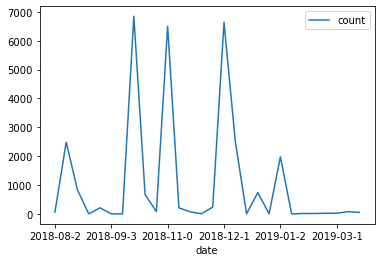

In [37]:
df.set_index('date', inplace=True)
ax=df.plot()
fig=ax.get_figure()
fig.savefig('register_date')